# 鳶尾花(Iris)品種的辨識

## 載入相關套件

In [109]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 1. 載入資料集

In [110]:
ds = datasets.load_iris()

## 2. 資料清理、資料探索與分析

In [111]:
# 資料集說明
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [112]:
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [113]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [114]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [115]:
# 觀察資料集彙總資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [116]:
# 描述統計量
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

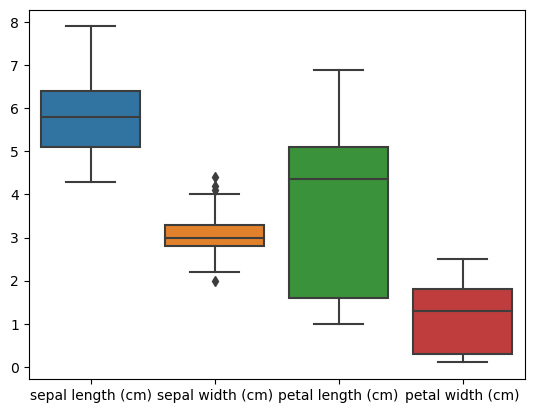

In [117]:
# 箱型圖
import seaborn as sns
sns.boxplot(data=df)

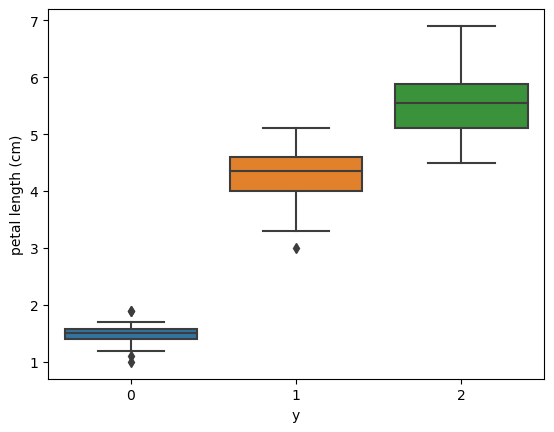

In [118]:
df2 = df.copy()
df2['y'] = y
sns.boxplot(x='y', y='petal length (cm)', data=df2);

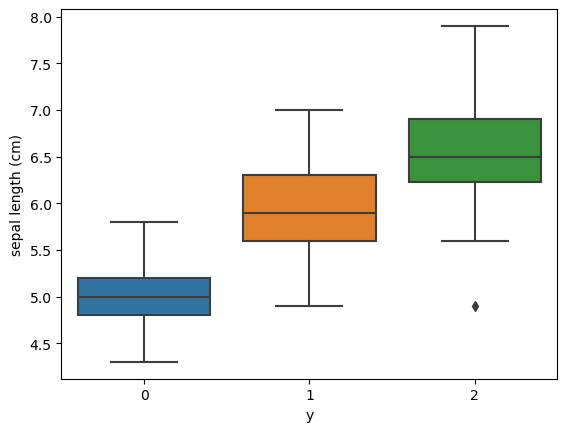

In [119]:
sns.boxplot(x='y', y='sepal length (cm)', data=df2);

In [120]:
# 是否有含遺失值(Missing value)
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [121]:
# 是否有含遺失值(Missing value)
df.isnull().sum().sum()

0

## 繪圖

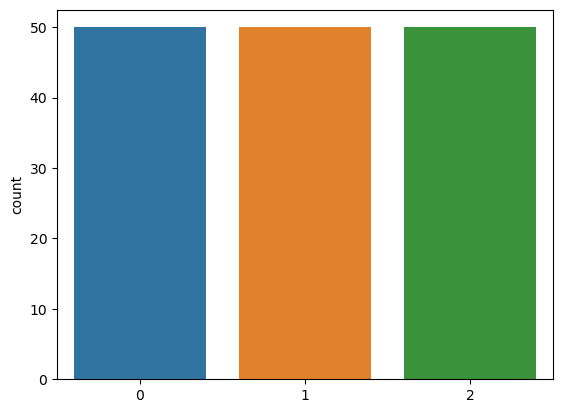

In [122]:
# y 各類別資料筆數統計
import seaborn as sns
sns.countplot(x=y);

In [123]:
# 以Pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

0    50
1    50
2    50
dtype: int64

## 3. 不須進行特徵工程

In [124]:
df2['ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y,ratio
0,5.1,3.5,1.4,0.2,0,1.457143
1,4.9,3.0,1.4,0.2,0,1.633333
2,4.7,3.2,1.3,0.2,0,1.468750
3,4.6,3.1,1.5,0.2,0,1.483871
4,5.0,3.6,1.4,0.2,0,1.388889
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.233333
146,6.3,2.5,5.0,1.9,2,2.520000
147,6.5,3.0,5.2,2.0,2,2.166667
148,6.2,3.4,5.4,2.3,2,1.823529


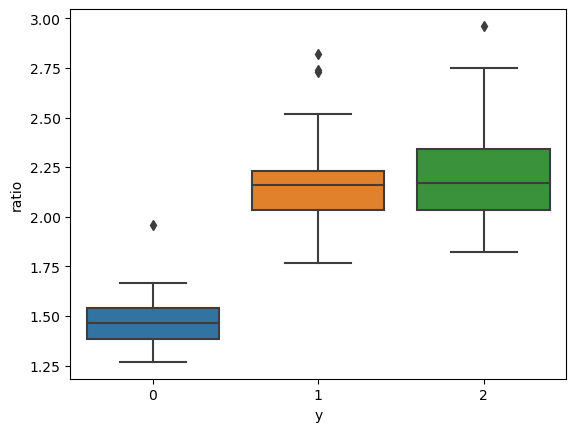

In [125]:
sns.boxplot(x='y', y='ratio', data=df2);

## 4. 資料分割

In [126]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [127]:
y_train

array([0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       0, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 0, 1, 2, 0, 2, 1, 2])

## 特徵縮放

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [129]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [130]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型評估

In [131]:
y_pred = clf.predict(X_test_std)
y_pred

array([2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 1,
       0, 0, 2, 1, 1, 0, 0, 1])

In [132]:
y_pred2 = clf.predict_proba(X_test_std)
y_pred2

array([[1.41756307e-05, 1.19571244e-02, 9.88028700e-01],
       [9.31880220e-01, 6.81161744e-02, 3.60567855e-06],
       [6.81942276e-05, 5.73859702e-02, 9.42545836e-01],
       [9.35301173e-01, 6.46973350e-02, 1.49195347e-06],
       [3.05669915e-02, 9.33590280e-01, 3.58427283e-02],
       [2.62031104e-05, 2.44607747e-02, 9.75513022e-01],
       [2.52861515e-02, 8.59734142e-01, 1.14979706e-01],
       [1.78014285e-03, 4.00517774e-01, 5.97702083e-01],
       [9.95303848e-01, 4.69610652e-03, 4.53926214e-08],
       [9.69702743e-01, 3.02969511e-02, 3.06093452e-07],
       [4.23705297e-05, 3.43983555e-02, 9.65559274e-01],
       [2.11637741e-04, 2.06624668e-01, 7.93163694e-01],
       [9.85499619e-01, 1.45001097e-02, 2.71056826e-07],
       [3.86629734e-04, 1.38478241e-01, 8.61135130e-01],
       [1.63691527e-06, 1.78879726e-02, 9.82110391e-01],
       [9.96823355e-01, 3.17663214e-03, 1.25096267e-08],
       [3.83625293e-03, 3.23865081e-01, 6.72298666e-01],
       [2.90631975e-02, 8.88139

In [133]:
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

100.00%


In [134]:
clf.score(X_test_std, y_test)

1.0

In [135]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0  7  0]
 [ 0  0 11]]


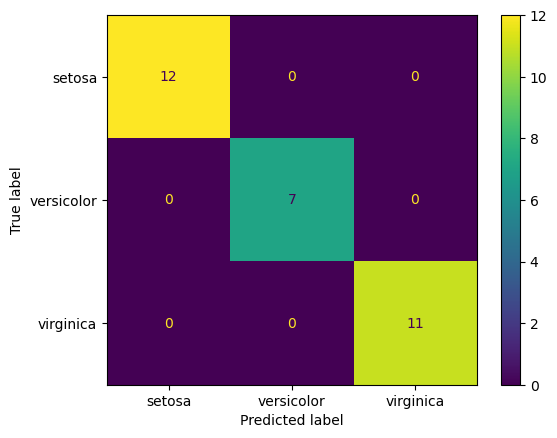

In [136]:
# 混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)
                              , display_labels=ds.target_names)
disp.plot()
plt.show()

## 8. 模型評估，暫不進行

In [139]:
from sklearn.svm import SVC
clf2 = SVC(kernel='rbf', degree=3)
clf2.fit(X_train_std, y_train)
clf2.score(X_test_std, y_test)

1.0

In [141]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear')
clf2.fit(X_train_std, y_train)
clf2.score(X_test_std, y_test)

1.0

## 9. 模型佈署

In [138]:
# 模型存檔
import joblib

joblib.dump(clf, 'model.joblib')
joblib.dump(scaler, 'scaler.joblib');

## 10.模型預測，請參見 01_05_iris_prediction.py